<a href="https://colab.research.google.com/github/darshan601/DE_LinkedInLearning/blob/main/pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=d19d80e8b33a6a531d1e66616ccaf268ef4b5fbb20bdd45451251491ba9d70d9
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
!pip install findspark

In [ ]:
import findspark

findspark.init()

from pyspark import SparkContext

sc=SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
from pyspark.sql import SparkSession

spark=SparkSession.builder.getOrCreate()

spark

#Import dataset https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

In [ ]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2023-09-30 03:39:15--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [    <=>             ]   1.74G  3.01MB/s    in 10m 22s 

2023-09-30 03:49:37 (2.86 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1865107243]



In [ ]:
!ls

'rows.csv?accessType=DOWNLOAD'	 sample_data


In [ ]:
!mv rows.csv\?accessType\=DOWNLOAD crimes.csv

In [ ]:
from pyspark.sql.functions import to_timestamp,col,lit

rc=spark.read.csv('crimes.csv',header=True)
rc.show(5)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|             

In [ ]:
rc.show(3)

+--------+-----------+--------------------+------------------+----+---------------+--------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|                Date|             Block|IUCR|   Primary Type|   Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+--------------------+------------------+----+---------------+--------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|08/25/2007 09:22:...|074XX N ROGERS AVE|0560|        ASSAULT|        SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|        NULL|        NULL|2007|08/17/2015 03:

#Schema


In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
from pyspark.sql.types import StructField,StructType,StringType,TimestampType,BooleanType,DoubleType,IntegerType

In [ ]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
# StructType([
#             StructField('ID',StringType,True),
#             StructField('Case Number',StringType,True),
#             StructField('Date',TimestampType,True),
#             StructField('Block',)



#  'IUCR',
#  'Primary Type',
#  'Description',
#  'Location Description',
#  'Arrest',
#  'Domestic',
#  'Beat',
#  'District',
#  'Ward',
#  'Community Area',
#  'FBI Code',
#  'X Coordinate',
#  'Y Coordinate',
#  'Year',
#  'Updated On',
#  'Latitude',
#  'Longitude',
#  'Location')



#             ])

In [ ]:
labels=[
 ('ID',StringType()),
 ('Case Number',StringType()),
 ('Date',TimestampType()),
 ('Block',StringType()),
 ('IUCR',StringType()),
 ('Primary Type',StringType()),
 ('Description',StringType()),
 ('Location Description',StringType()),
 ('Arrest',StringType()),
 ('Domestic',StringType()),
 ('Beat',StringType()),
 ('District',StringType()),
 ('Ward',StringType()),
 ('Community Area',StringType()),
 ('FBI Code',StringType()),
 ('X Coordinate',StringType()),
 ('Y Coordinate',StringType()),
 ('Year',IntegerType()),
 ('Updated On',StringType()),
 ('Latitude',DoubleType()),
 ('Longitude',DoubleType()),
 ('Location',StringType())
]

In [ ]:
schema=StructType([StructField(x[0],x[1],True) for x in labels])
schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', StringType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', IntegerType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', DoubleType(), True), StructField('Longitude', DoubleType(), True), StructField('Location', StringT

In [ ]:
# rc=spark.read.csv('crimes.csv',schema=schema,header=True)
# rc.printSchema()

In [ ]:
rc.show(5)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|             

##COlumns


In [ ]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0560|
|0820|
|1320|
|1153|
|0281|
+----+
only showing top 5 rows



In [ ]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|0560|
|0820|
|1320|
|1153|
|0281|
+----+
only showing top 5 rows



show 4 rows of colums

In [ ]:
rc.select('Case Number','Date','Arrest').show(5)

+-----------+--------------------+------+
|Case Number|                Date|Arrest|
+-----------+--------------------+------+
|   HN549294|08/25/2007 09:22:...| false|
|   HH109118|01/05/2002 09:24:...|  true|
|   JG415333|09/06/2023 05:00:...| false|
|   JG423627|08/31/2023 12:00:...| false|
|   JG422532|07/24/2023 09:45:...| false|
+-----------+--------------------+------+
only showing top 5 rows



Add a column with only 1s

In [ ]:
from pyspark.sql.functions import lit

In [ ]:
rc.withColumn('One',lit(1)).show(5)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE| 

Drop column IUCR

In [ ]:
# rc=rc.drop('IUCR')
# rc.show(5)

##Working with rows

In [ ]:
one_day=rc.filter(col('Location Description')==lit('BANK'))

In [ ]:
one_day.count()

31536

In [ ]:
one_day.show(5)

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13201593|   JG413294|09/06/2023 09:42:...|003XX N DESPLAINE...|1330| CRIMINAL TRESPASS|             TO LAND|                BANK|

In [ ]:
one_day.orderBy('Date',ascending=False).show(10)

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12937974|   JF528715|12/31/2022 09:15:...| 061XX N WESTERN AVE|1120|DECEPTIVE PRACTICE|             FORGERY|                BANK|

In [ ]:
rc.groupBy('Primary Type').count().orderBy('count',ascending=False).show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|               THEFT|1667237|
|             BATTERY|1442831|
|     CRIMINAL DAMAGE| 900611|
|           NARCOTICS| 749772|
|             ASSAULT| 517376|
|       OTHER OFFENSE| 490262|
|            BURGLARY| 427509|
| MOTOR VEHICLE THEFT| 387834|
|  DECEPTIVE PRACTICE| 352691|
|             ROBBERY| 297071|
|   CRIMINAL TRESPASS| 216241|
|   WEAPONS VIOLATION| 110394|
|        PROSTITUTION|  69933|
|OFFENSE INVOLVING...|  56598|
|PUBLIC PEACE VIOL...|  52713|
|         SEX OFFENSE|  31408|
| CRIM SEXUAL ASSAULT|  27575|
|INTERFERENCE WITH...|  18629|
|LIQUOR LAW VIOLATION|  14981|
|            GAMBLING|  14624|
+--------------------+-------+
only showing top 20 rows



#Challenge

What percentage of reported crime resulted in an arrest?

In [ ]:
rc.select("Arrest").distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [ ]:
rc.filter(col('Arrest')=='true').count() / rc.select('Arrest').count()

0.2593079516183606

Top 3 locations for reported Crimes?

In [ ]:
two=rc.groupBy('Location Description').count()

In [ ]:
two.show()

+--------------------+------+
|Location Description| count|
+--------------------+------+
|   RAILROAD PROPERTY|    15|
|SCHOOL - PRIVATE ...|   847|
|AIRPORT TERMINAL ...|  2401|
|VEHICLE - COMMERCIAL|   704|
|EXPRESSWAY EMBANK...|     1|
|RESIDENCE - YARD ...| 10379|
|POLICE FACILITY/V...| 18566|
|               MOTEL|     7|
|CHA PARKING LOT /...|  1581|
|            SIDEWALK|735195|
|PUBLIC GRAMMAR SC...|     2|
|OTHER RAILROAD PR...|   398|
|            CAR WASH|  3394|
|   TRUCKING TERMINAL|     1|
|    AIRPORT/AIRCRAFT| 16279|
|            HOSPITAL|    13|
|    FEDERAL BUILDING|   980|
|MEDICAL/DENTAL OF...|  7430|
|             TRAILER|     4|
|         CTA STATION|  6871|
+--------------------+------+
only showing top 20 rows



In [ ]:
two.orderBy('count',ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|2061219|
|           RESIDENCE|1319844|
|           APARTMENT| 900051|
+--------------------+-------+
only showing top 3 rows



///////

In [ ]:
from pyspark.sql import functions

In [ ]:
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Type', 'Union', 'UserDefinedFunction', 'UserDefinedTableFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_create_py_udtf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aes_decrypt', 'aes_encrypt', 'aggregate', 'any_value', 'approxCountDistinct', 'approx_count_distinct', 'approx_percentil

##String Functions

Display the Primary Type column in lower and upper characters and the firrst 4 characters of the columns

In [ ]:
from pyspark.sql.functions import lower, upper, substring

In [ ]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [ ]:
rc.show(3)

+--------+-----------+--------------------+------------------+----+---------------+--------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|                Date|             Block|IUCR|   Primary Type|   Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+--------------------+------------------+----+---------------+--------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|08/25/2007 09:22:...|074XX N ROGERS AVE|0560|        ASSAULT|        SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|        NULL|        NULL|2007|08/17/2015 03:

In [ ]:
rc.select(lower(col('Primary Type')),upper(col('Primary Type')),substring(col('Primary Type'),1,4)).show(3)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            assault|            ASSAULT|                         ASSA|
|              theft|              THEFT|                         THEF|
|    criminal damage|    CRIMINAL DAMAGE|                         CRIM|
+-------------------+-------------------+-----------------------------+
only showing top 3 rows



##Numeric functions

SHow the oldest date and the most recent date

In [ ]:
from pyspark.sql.functions import min,max

In [ ]:
rc.select(min(col('Date')),max(col('Date'))).show()

+--------------------+--------------------+
|           min(Date)|           max(Date)|
+--------------------+--------------------+
|01/01/2001 01:00:...|12/31/2022 12:59:...|
+--------------------+--------------------+



##Date

What is 3 days earlier than the oldest date and 3 days later than the most recent date

In [ ]:
from pyspark.sql.functions import date_add,date_sub,date_diff

In [ ]:
rc.select(date_sub(max(col('Date')),3),date_add(max(col('Date')),3)).show()

+----------------------+----------------------+
|date_sub(max(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|                  NULL|                  NULL|
+----------------------+----------------------+



In [ ]:
rc.schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', StringType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', StringType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', StringType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', StringType(), True), StructField('Longitude', StringType(), True), StructField('Location', StringType(

Christmas Code

In [ ]:
df=spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show()

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [ ]:
df.schema

StructType([StructField('Christmas', StringType(), True)])

In [ ]:
from pyspark.sql.functions import to_date
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'),to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show()

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



In [ ]:
df=spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'),to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show()

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



In [ ]:
df=spark.createDataFrame([('25-Dec-2019',)],['Christmas'])
df.select(to_date(col('Christmas'),'dd-MMM-yyyy'),to_timestamp(col('Christmas'),'dd-MMM-yyyy')).show()

+-------------------------------+------------------------------------+
|to_date(Christmas, dd-MMM-yyyy)|to_timestamp(Christmas, dd-MMM-yyyy)|
+-------------------------------+------------------------------------+
|                     2019-12-25|                 2019-12-25 00:00:00|
+-------------------------------+------------------------------------+



In [ ]:
df=spark.createDataFrame([('12/25/2019 09:00:01 PM',)],['Christmas'])
df.select(to_date(col('Christmas'),'MM/dd/yyyy hh:mm:ss a'),to_timestamp(col('Christmas'),'MM/dd/yyyy hh:mm:ss a')).show()

+-----------------------------------------+----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------------+----------------------------------------------+
|                               2019-12-25|                           2019-12-25 21:00:01|
+-----------------------------------------+----------------------------------------------+



In [ ]:
df=spark.createDataFrame([('12/25/2019 09:00:01 PM',)],['Christmas'])
df.show(truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 09:00:01 PM|
+----------------------+



In [ ]:
df.select(to_date(col('Christmas'),'MM/dd/yyyy hh:mm:ss a'),to_timestamp(col('Christmas'),'MM/dd/yyyy hh:mm:ss a')).show()

+-----------------------------------------+----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------------+----------------------------------------------+
|                               2019-12-25|                           2019-12-25 21:00:01|
+-----------------------------------------+----------------------------------------------+



#Converting strings to Date in csv file

In [ ]:
rc.select(col("Date")).show(5,truncate=False)

+----------------------+
|Date                  |
+----------------------+
|08/25/2007 09:22:18 AM|
|01/05/2002 09:24:00 PM|
|09/06/2023 05:00:00 PM|
|08/31/2023 12:00:00 PM|
|07/24/2023 09:45:00 PM|
+----------------------+
only showing top 5 rows



In [ ]:
rc.Date=rc.select(to_date(col("Date"),'MM/dd/yyyy hh:mm:ss a'))

In [ ]:
rc.select(col("Date")).show(5,truncate=False)

+----------------------+
|Date                  |
+----------------------+
|08/25/2007 09:22:18 AM|
|01/05/2002 09:24:00 PM|
|09/06/2023 05:00:00 PM|
|08/31/2023 12:00:00 PM|
|07/24/2023 09:45:00 PM|
+----------------------+
only showing top 5 rows



In [ ]:
rc.schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', StringType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', StringType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', StringType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', StringType(), True), StructField('Longitude', StringType(), True), StructField('Location', StringType(

##Joins

Download chicago police station data

In [ ]:
!wget https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2023-09-30 04:11:17--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [ <=>                ]   5.57K  --.-KB/s    in 0s      

2023-09-30 04:11:17 (1.85 GB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [5699]



In [ ]:
!mv rows.csv\?accessType\=DOWNLOAD police-station.csv

In [ ]:
ps=spark.read.csv('police-station.csv', header=True)

In [ ]:
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        NULL|        NULL|        NULL| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

Add the district name by joining with the police station dataset

In [ ]:
rc.cache()
rc.count()

7899939

In [ ]:
ps.select(col('District')).distinct().show(30)

+--------------------+
|            District|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [ ]:
rc.select(col('District')).distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|     021|
|      16|
|    NULL|
+--------+



In [ ]:
from pyspark.sql.functions import lpad

In [ ]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col: 'ColumnOrName', len: int, pad: str) -> pyspark.sql.column.Column
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target column to work on.
    len : int
        length of the final string.
    pad : str
        chars to prepend.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        left padded result.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [ ]:
ps.select(lpad(col('District'),3,'0')).show(20)

+--------------------+
|lpad(District, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [ ]:
ps=ps.withColumn('Format_District',lpad(col('District'),3,'0'))

In [ ]:
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_District|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        NULL|        NULL|        NULL| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [ ]:
rc.join(ps,rc.District==ps.Format_District,'left_outer').show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_

In [ ]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_District']

In [ ]:
rc.join(ps,rc.District==ps.Format_District,'left_outer').drop('ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_District').show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|2007|08/17/2015 03:03:...|      24|   Rogers Park|
| 1930689|   HH109118|01/05/2002

Find the most frequently reported noncriminal activity

In [ ]:
rc.count()

7899939

In [ ]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(36,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [ ]:
nc=rc.filter((col('Primary Type')=='NON - CRIMINAL')|(col('Primary Type')=='NON-CRIMINAL')|(col('Primary Type')=='NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show()

+-------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|     ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+-------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|8773145|   HV447848|08/25/2012 03:00:...|    100XX W OHARE ST|5093|        NON-CRIMINAL|       LOST PASSPORT|AIRPORT TERMINAL 

In [ ]:
nc.groupBy(col('Description')).count().orderBy(col('count'),ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |111  |
|FOID - REVOCATION                          |76   |
|CONCEALED CARRY LICENSE REVOCATION         |19   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



Find the day of the week with the most reported crime

In [ ]:
dw=rc.withColumn('newDate',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a'))

In [ ]:
dw.show(5)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|            newDate|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-------------------+
| 5741943|   HN549294|08/25/2007 09:22:...|  074XX N ROGERS AVE|

In [ ]:
from pyspark.sql.functions import dayofweek
dw.select(col('newDate'),dayofweek(col('newDate'))).show(5)

+-------------------+------------------+
|            newDate|dayofweek(newDate)|
+-------------------+------------------+
|2007-08-25 09:22:18|                 7|
|2002-01-05 21:24:00|                 7|
|2023-09-06 17:00:00|                 4|
|2023-08-31 12:00:00|                 5|
|2023-07-24 21:45:00|                 2|
+-------------------+------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import date_format

In [ ]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date: 'ColumnOrName', format: str) -> pyspark.sql.column.Column
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    Whenever possible, use specialized functions like `year`.
    
    Parameters
    ----------
    date : :class:`~pyspark.sql.Column` or str
        input column of values to format.
    format: str
        format to use to represent datetime values.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        string value repres

In [ ]:
dw.select(col('newDate'),dayofweek(col('newDate')),date_format(col('newDate'),'E')).show(5)

+-------------------+------------------+-----------------------+
|            newDate|dayofweek(newDate)|date_format(newDate, E)|
+-------------------+------------------+-----------------------+
|2007-08-25 09:22:18|                 7|                    Sat|
|2002-01-05 21:24:00|                 7|                    Sat|
|2023-09-06 17:00:00|                 4|                    Wed|
|2023-08-31 12:00:00|                 5|                    Thu|
|2023-07-24 21:45:00|                 2|                    Mon|
+-------------------+------------------+-----------------------+
only showing top 5 rows



In [ ]:
dw.groupBy(date_format(col('newDate'),'E')).count().show()

+-----------------------+-------+
|date_format(newDate, E)|  count|
+-----------------------+-------+
|                    Sun|1075449|
|                    Mon|1116660|
|                    Thu|1124317|
|                    Sat|1131833|
|                    Wed|1136190|
|                    Tue|1129204|
|                    Fri|1186286|
+-----------------------+-------+



In [ ]:
dw.groupBy(date_format(col('newDate'),'E')).count().orderBy('count',ascending=False).show()

+-----------------------+-------+
|date_format(newDate, E)|  count|
+-----------------------+-------+
|                    Fri|1186286|
|                    Wed|1136190|
|                    Sat|1131833|
|                    Tue|1129204|
|                    Thu|1124317|
|                    Mon|1116660|
|                    Sun|1075449|
+-----------------------+-------+



In [ ]:
dw.groupBy(date_format(col('newDate'),'E')).count().collect()

[Row(date_format(newDate, E)='Sun', count=1075449),
 Row(date_format(newDate, E)='Mon', count=1116660),
 Row(date_format(newDate, E)='Thu', count=1124317),
 Row(date_format(newDate, E)='Sat', count=1131833),
 Row(date_format(newDate, E)='Wed', count=1136190),
 Row(date_format(newDate, E)='Tue', count=1129204),
 Row(date_format(newDate, E)='Fri', count=1186286)]

In [ ]:
dow=[x[0] for x in dw.groupBy(date_format(col('newDate'),'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Tue', 'Fri']

In [ ]:
cnt=[x[1] for x in dw.groupBy(date_format(col('newDate'),'E')).count().collect()]
cnt

[1075449, 1116660, 1124317, 1131833, 1136190, 1129204, 1186286]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
cp=pd.DataFrame({'Day_of_week':dow,'Count':cnt})
cp.head(7)

,Day_of_week,Count
0,Sun,1075449
1,Mon,1116660
2,Thu,1124317
3,Sat,1131833
4,Wed,1136190
5,Tue,1129204
6,Fri,1186286


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['Day_of_week'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_5, *[[['index', 'Count']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_6, *['index', 'Day_of_week'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_7, *['Count', 'Day_of_week'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['index', 'Count', 'Day_of_week'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['index', 'count()', 'Day_of_week'], **{})
chart

Text(0.5, 1.0, 'No of Reported crimes per day of the week')

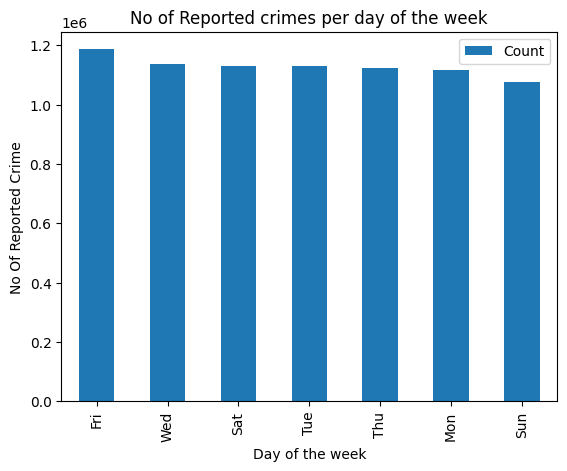

In [ ]:
cp.sort_values('Count',ascending=False).plot(kind='bar',x='Day_of_week',y='Count')
plt.xlabel('Day of the week')
plt.ylabel('No Of Reported Crime')
plt.title('No of Reported crimes per day of the week')

#RDDs

In [ ]:
psrdd=sc.textFile('police-station.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [ ]:
ps_header=psrdd.first()

In [ ]:
ps_rest=psrdd.filter(lambda line: line!=ps_header)

In [ ]:
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

How many police Station are there

In [ ]:
ps_rest.map(lambda line:line.split(',')).count()

24

In [ ]:
ps_rest.filter(lambda line:line.split(',')[0]=='7').map(lambda line: (line.split(',')[0],
                  line.split(',')[1],
                  line.split(',')[2],
                  line.split(',')[5],

                  )).collect()

[('7', 'Englewood', '1438 W 63rd St', '60636')]

Display district id, district name address and zip code, for station 10 and 11

In [ ]:
(ps_rest.filter(lambda line: line.split(',')[0] in ['10','11']).
map(lambda line: (line.split(',')[1],
                  line.split(',')[2],
                   line.split(',')[5]

                  )).collect())

[('Ogden', '3315 W Ogden Ave', '60623'),
 ('Harrison', '3151 W Harrison St', '60612')]